# 선형회귀분석의 기초

회귀분석(regression analysis)은 독립변수 $x$와 이에 대응하는 실수 종속변수 $y$간의 관계를 정량화하는 작업이다. 

회귀분석에는 결정론적 모형(Deterministic Model)과 확률적 모형(Probabilistic Model)이 있다. 
결정론적 모형은 단순히 독립 변수 $x$에 대해 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ \hat{y} = f \left( x \right) $$

이 함수는 모형계수 추정을 위한 과거 자료 $ \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} $에 의존하므로 다음과 같이 표기하기도 한다.

$$ \hat{y} = f \left( x; \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} \right) $$


만약 함수 $f(x)$가 다음과 같은 선형 함수이면 선형회귀분석(linear regression analysis)이라고 한다.

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_K x_K $$

위 식에서 $w_0, \cdots, w_K$는 위 함수의 계수(coefficient)이자 이 선형회귀모형의 모수(parameter)이다. 

## 오그멘테이션 (Augmentation)

상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다. 이를 오그멘테이션(augmentation)이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iK}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iK}
\end{bmatrix}
$$

오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1K} \\
x_{21} & x_{22} & \cdots & x_{2K} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{NK} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1K} \\
1 & x_{21} & x_{22} & \cdots & x_{2K} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{NK} \\
\end{bmatrix}
$$

이렇게 되면 전체 수식이 다음과 같이 가중치 벡터와 입력 데이터 벡터의 내적으로 간단히 표시된다.

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_K x_K
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_K
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_K
\end{bmatrix}
= x_a^T w = w^T x_a
$$

상수항이 0이 아닌 경우에는 항상 오그멘테이션을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 오그멘테이션이 되어 있는 경우가 많다.  

다음은 오그멘테이션을 하는 코드 예제이다.

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [2]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [3]:
# 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

StatsModels에는 오그멘테이션을 위한 `add_constant` 함수가 제공된다.

In [4]:
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## OLS (Ordinary Least Squares)

OLS는 가장 기본적인 결정론적 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.


* 잔차 벡터
$$ e = {y} - Xw $$

* 잔차제곱합
$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

* 행렬 미분으로 구한 그레디언트
$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w $$

* 최적화 조건
$$ \dfrac{d \text{RSS}}{d w}  = 0 $$

$$ X^TX w = X^T y $$

$$  w = (X^TX)^{-1} X^T y $$


여기에서 그레디언트를 나타내는 다음 식을 **정규 방정식(Normal equation)**이라고 한다.

$$ X^T y - X^TX w = 0 $$

정규방정식에서 **잔차 벡터가 모든 데이터 벡터들과 각각 직교**함을 알 수 있다.

$$ X^T (y - X w ) = X^T e = 0 $$

$$ x_i^T e = 0 $$

$$ x_i \perp e $$

여기에서 $x_i$는 모든 데이터의 $i$번째 차원의 원소로 이루어진 데이터 벡터이다.

다음은 OLS 방법으로 선형회귀분석을 하는 예제이다.

In [5]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [6]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("w:\n", w)

w:
 [[ 102.02701439]
 [  81.59750943]]


In [7]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0] ## OLS 방법
w

array([[ 102.02701439],
       [  81.59750943]])

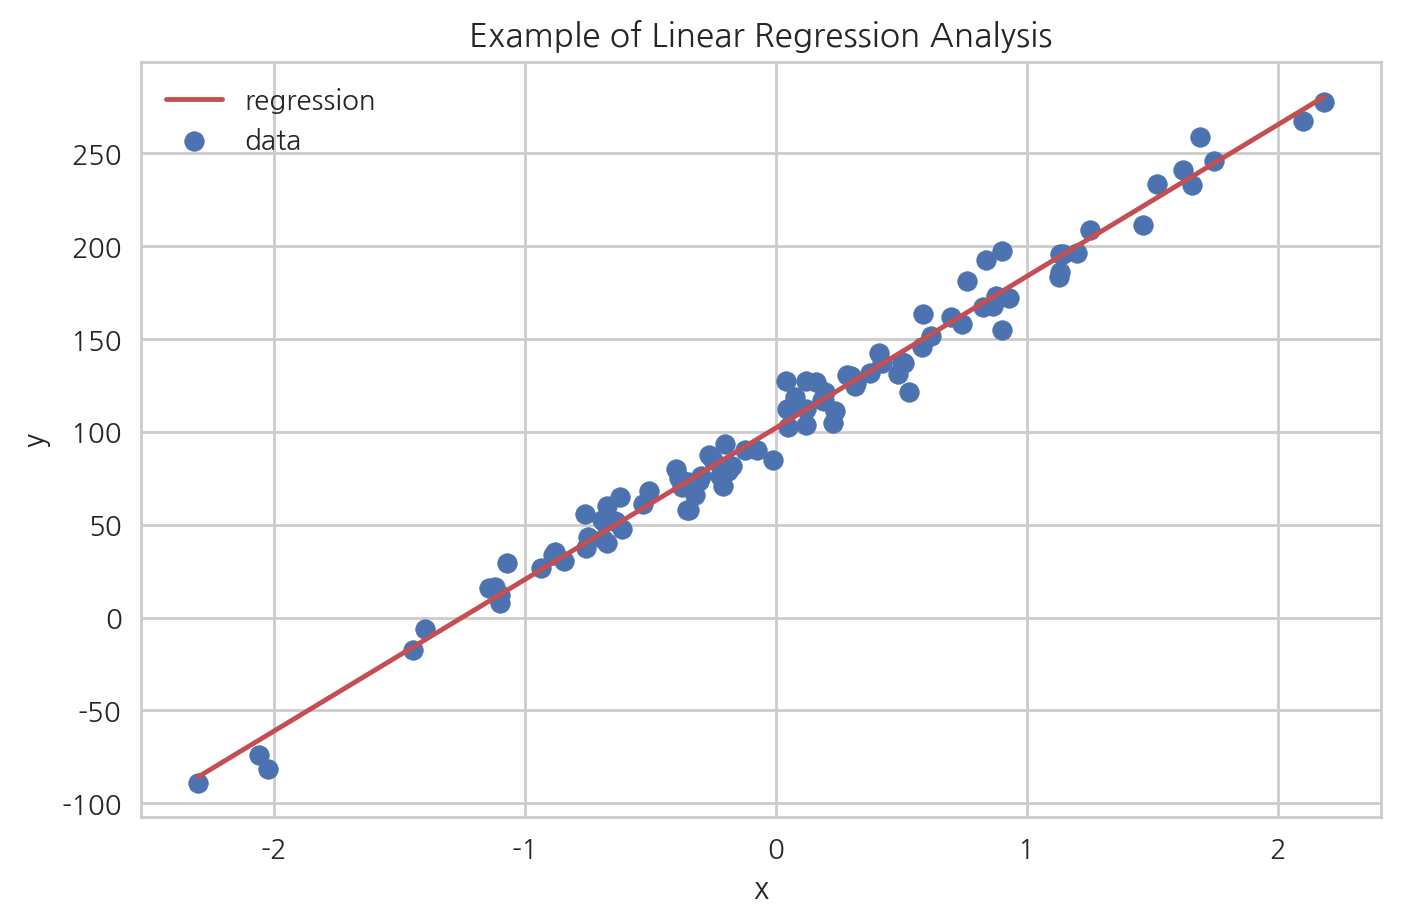

In [8]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션을 설정 
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

##  Scikit-Learn 패키지를 사용한  선형회귀분석

Scikit-Learn 패키지를 사용하여 선형회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.

1. `LinearRegression` 클래스 객체 생성
    ```
    model = LinearRegression(fit_intercept=True)
    ```
    상수항이 없으면 `fit_intercept=False`로 설정한다.

2. `fit` 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.
    ```
    model.fit(X, y)
    ```
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다.
    * `coef_` : 추정된 가중치 벡터
    * `intercept_` : 추정된 상수항 

3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    ```
    y_new = model.predict(x_new)
    ```

다음은 보스턴 집값 데이터를 사용하여 회귀분석을 하는 예이다.

In [4]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

print(model_boston.coef_) ## 가중치 벡터 w의 값 추정치
print(model_boston.intercept_) ## 절편 추정치

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


In [6]:
from scipy.stats import norm

import numpy as np
import scipy as sp
from pandas.core import datetools as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """


In [9]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show() ## 완벽한 직선이 되면 퍼펙트한 직선이 됨 

## StatsModels 를 사용한 선형회귀분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.


1. `OLS` 클래스 객체 생성. 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.
    ```
    model = OLS(y, X)
    ```
    
2. `fit` 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    ```
    result = model.fit() ## result를 반환 
    ```

3. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

In [13]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEKV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEKV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 26 Jun 2017   Prob (F-statistic):          6.95e-135
Time:                        18:52:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [3]:
   OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEKV   R-squared:                       0.741
Model: ##추정방법                 OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 26 Jun 2017   Prob (F-statistic):#p-value  6.95e-135
Time:                        18:52:54   Log-Likelihood:                -1498.8
No. Observations: #데이터개수     506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:# 정규성 검정         178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

SyntaxError: invalid syntax (<ipython-input-3-32cb2aa102db>, line 1)

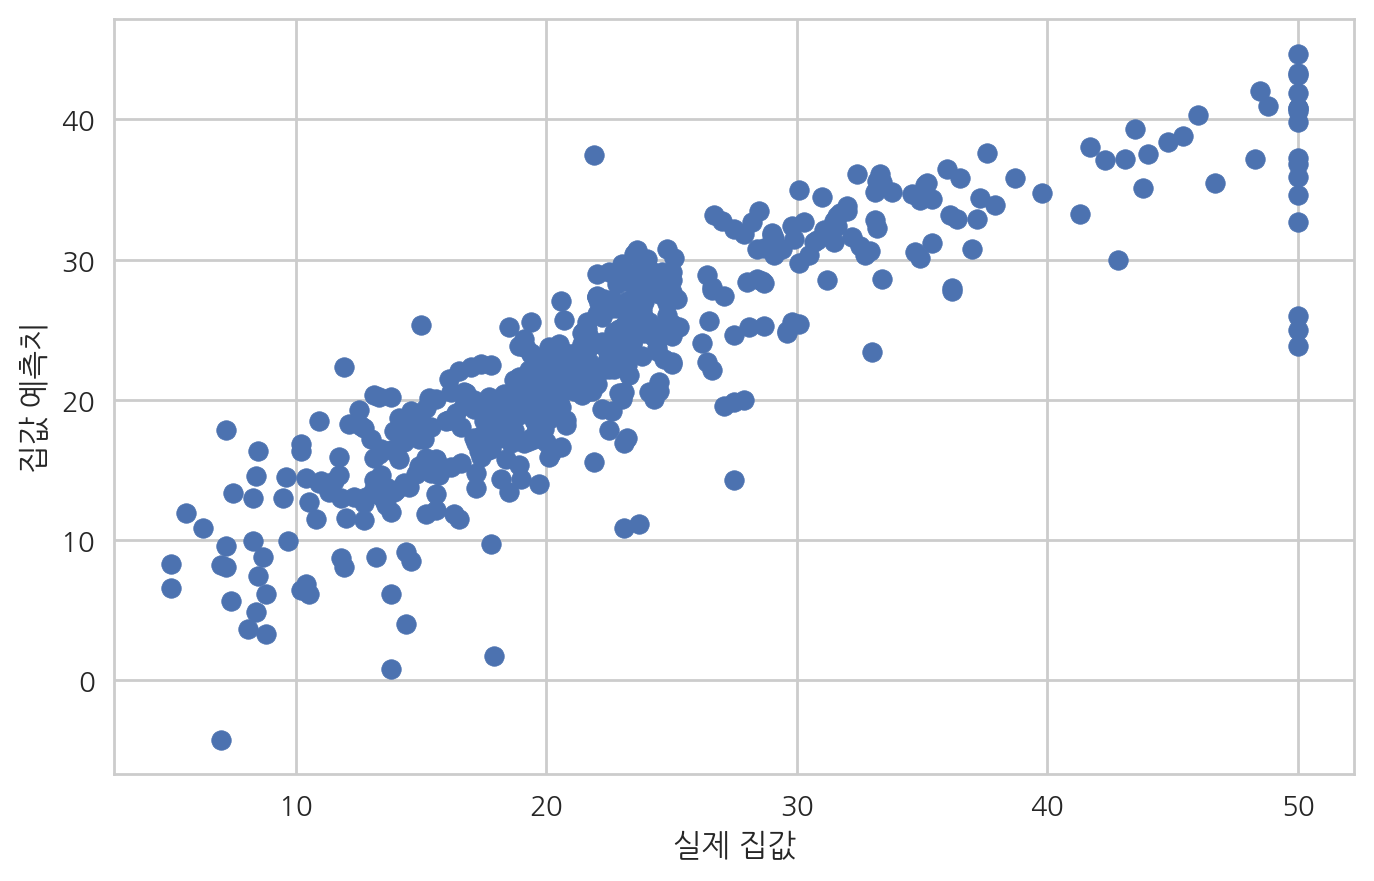

In [14]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

예측을 할 때는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. 예를 들어 다음과 같은 입력데이터를 생각해보자.

In [15]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13] ## 새로운 데이터 

이 데이터는 원래 입력데이터의 평균값에서 힌트를 얻어 만든 가상의 데이터이다.

In [16]:
dfX0.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

다음과 같이 원래 데이터와 동일한 형태의 데이터프레임을 만들어야 한다. 여기에서 데이터 행이 하나인 경우에는 `add_constant`에 `has_constant="add"` 인수를 추가해야 한다.

In [10]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, columns=boston.feature_names), 
                          has_constant="add") ## 똑같은 데이터셋을 만들어서 넣어야함 
dfx_new

AttributeError: module 'pandas.core.datetools' has no attribute 'DataFrame'

In [18]:
result_boston2.predict(dfx_new)

0    18.854172
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* `resid`: 잔차 벡터
* `params`: 모수 벡터

이외에도 여러가지 분석에 필요한 다양한 메서드도 제공한다.

In [19]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [24]:
result_boston2.resid.head() ## residual 속성 

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

이외에도 StatsModels 패키지는 회귀분석 결과를 살펴볼 수 있는 다양한 도구를 제공한다. 다음은 StatsModels 패키지가 제공하는 분석용 함수의 예이다.

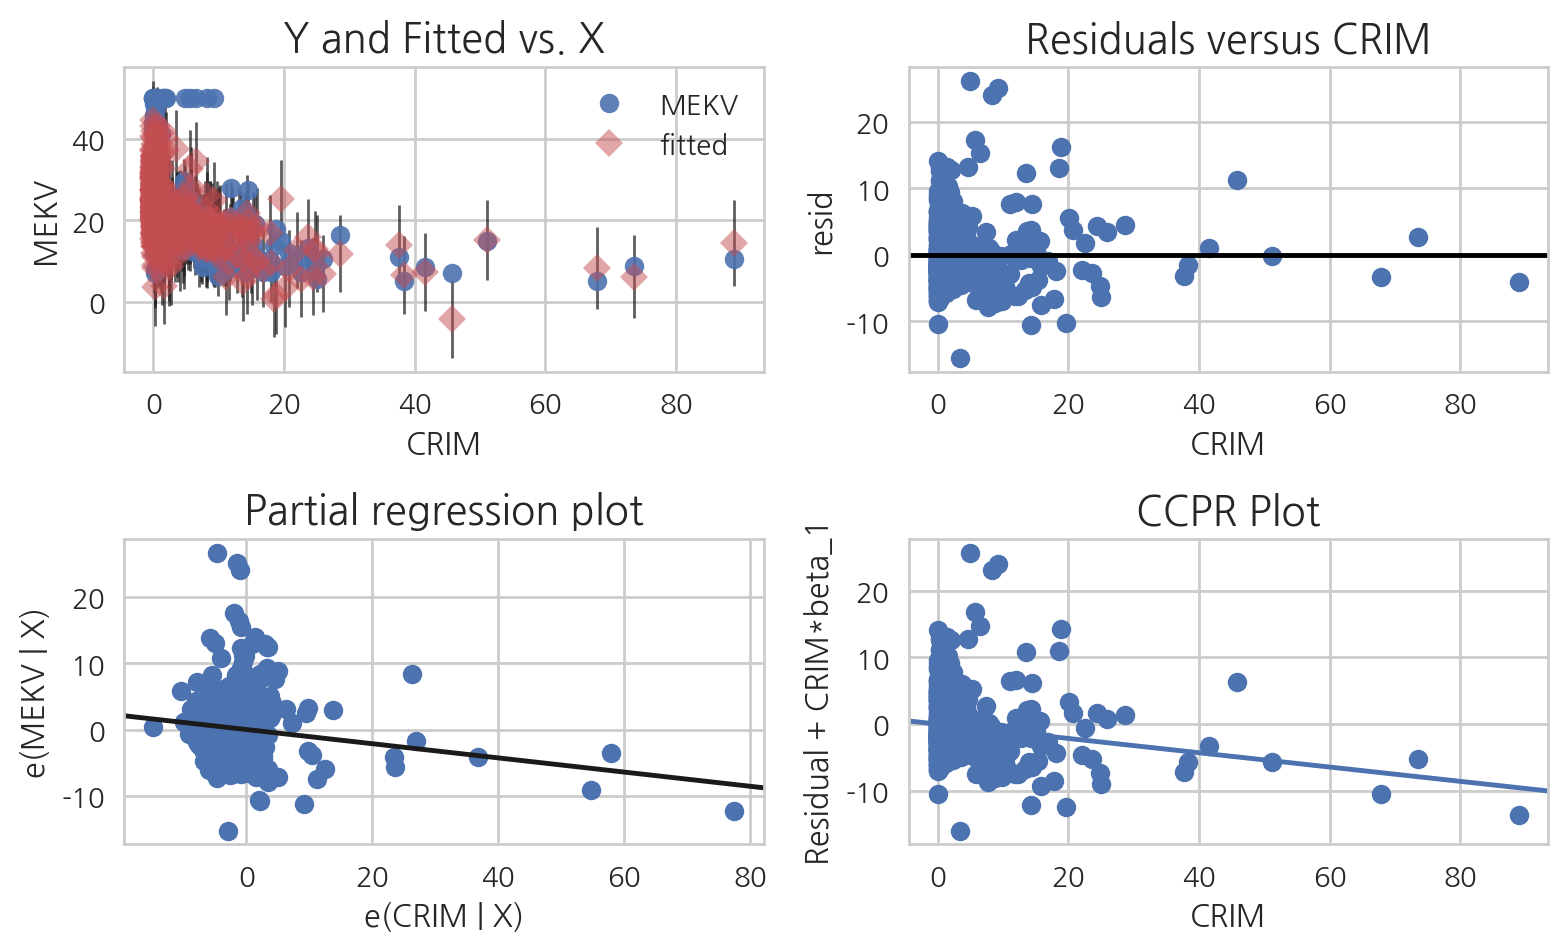

In [26]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM") ## crime rate 
fig.suptitle("")
plt.show() ## Residual Vs. CRIM (X가 바뀜에 따라 Residual 의분포가 어떻게 바뀌는지 얼만큼 0에서 멀어지는지 좁아지는지 확인) 제일중요